In [1]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,GRU,SimpleRNN,Dense,Input,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
df=pd.read_csv('./datasets/bbc_text_cls.csv')

In [3]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [5]:
df['targets']=df['labels'].astype('category').cat.codes

In [6]:
#number of classes
K=df['targets'].max()+1
K

5

In [7]:
df_train,df_test=train_test_split(df,test_size=0.3)

In [9]:
#convert sentences to sequence
MAX_VOCAB_SIZE=2000
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])
train_sequence=tokenizer.texts_to_sequences(df_train['text'])
test_sequence=tokenizer.texts_to_sequences(df_test['text'])

In [10]:
#get word->index
word2idx=tokenizer.word_index
V=len(word2idx)
print("Found %s unique tokens: "%V)

Found 27649 unique tokens: 


In [12]:
#pad sequnces to get NxT matrix
data_train=pad_sequences(train_sequence)
print("shape of data train tensor: ",data_train.shape)

shape of data train tensor:  (1557, 2839)


In [13]:
T=data_train.shape[1] #sequnce length

In [15]:
data_test=pad_sequences(test_sequence, maxlen=T)
print("shape of data test tensor: ",data_test.shape)

shape of data test tensor:  (668, 2839)


In [16]:
#create model

D=20 #embedding dimension

i=Input(shape=(T,))
l1=Embedding(V+1,D)(i)
l2=LSTM(32,return_sequences=True)(l1)
l3=GlobalMaxPooling1D()(l2)
x=Dense(K)(l3)

model=Model(i,x)

In [17]:
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

In [18]:
history=model.fit(data_train,df_train['targets'],epochs=50,validation_data=(data_test,df_test['targets']))

Epoch 1/50
49/49 [==============================] - 82s 2s/step - loss: 1.5983 - accuracy: 0.3128 - val_loss: 1.5754 - val_accuracy: 0.4521
Epoch 2/50
49/49 [==============================] - 75s 2s/step - loss: 1.4221 - accuracy: 0.4355 - val_loss: 1.2592 - val_accuracy: 0.4431
Epoch 3/50
49/49 [==============================] - 77s 2s/step - loss: 1.1509 - accuracy: 0.4534 - val_loss: 1.0685 - val_accuracy: 0.4805
Epoch 4/50
49/49 [==============================] - 87s 2s/step - loss: 0.9947 - accuracy: 0.5453 - val_loss: 0.9457 - val_accuracy: 0.6317
Epoch 5/50
49/49 [==============================] - 75s 2s/step - loss: 0.8414 - accuracy: 0.7245 - val_loss: 0.7590 - val_accuracy: 0.8608
Epoch 6/50
49/49 [==============================] - 75s 2s/step - loss: 0.5954 - accuracy: 0.8934 - val_loss: 0.5382 - val_accuracy: 0.8952
Epoch 7/50
49/49 [==============================] - 75s 2s/step - loss: 0.5267 - accuracy: 0.8452 - val_loss: 1.4835 - val_accuracy: 0.4775
Epoch 8/50
49/49 [==

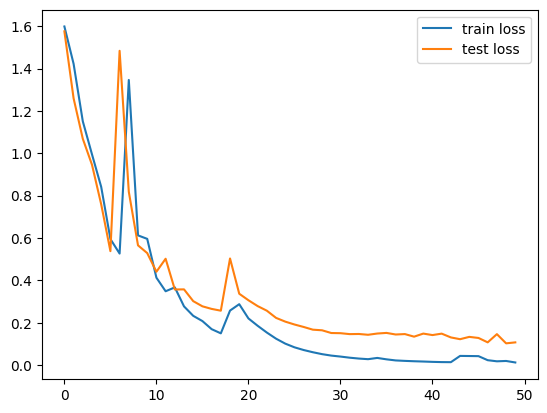

In [20]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='test loss')
plt.legend()

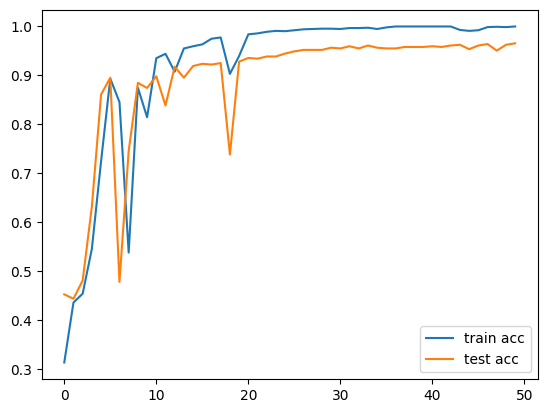

In [21]:
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='test acc')
plt.legend()